# House Price Prediction System

## Introduction
This project involves developing a predictive model to forecast house prices based on various features of the houses. We'll use the sample_submission.csv dataset for this task. The project will include data collection, preprocessing, feature engineering, model selection, and evaluation.

In [1]:

import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(r'C:\Users\DANIEL\Downloads\sample_submission.csv')

# Display the first few rows of the dataset
print(data.head())
print(data.info())
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())


     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None
                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179183.918243
std     421.321334   16518.303051
min    1461.000000  135751.318893
25%    1825.500000  168703.011202
50%    2190.000000  179208.665698
75%    2554.500000  186789.409363
max    2919.000000  281643.976117
Id           0
SalePrice    0
dtype: int64


## Handle Missing Values

In [2]:

# Fill missing values (simple strategy)
data = data.fillna(method='ffill').fillna(method='bfill')


## Encode Categorical Variables

In [3]:

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)


## Normalize Numerical Features

In [4]:

from sklearn.preprocessing import StandardScaler

# Normalize numerical features
scaler = StandardScaler()
numerical_features = data.select_dtypes(include=[np.number])
data[numerical_features.columns] = scaler.fit_transform(numerical_features)


## Feature Selection

In [5]:

from sklearn.feature_selection import SelectKBest, f_regression

# Assuming 'SalePrice' is the target variable and removing it from features
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Apply normalization
X_scaled = scaler.fit_transform(X)

# Ensure there are at least 20 features to select from
num_features = min(20, X_scaled.shape[1])

# Select top features
selector = SelectKBest(score_func=f_regression, k=num_features)
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['Id'], dtype='object')


## Model Training and Evaluation

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 0.9369384202828818


### Linear Regression and Random Forest

In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Linear Regression MSE: {mse_lr}')
print(f'Random Forest MSE: {mse_rf}')

r2_lr = lr.score(X_test, y_test)
r2_rf = rf.score(X_test, y_test)
print(f'Linear Regression R^2: {r2_lr}')
print(f'Random Forest R^2: {r2_rf}')


Linear Regression MSE: 0.8784369009982607
Random Forest MSE: 1.105778050550712
Linear Regression R^2: 0.008827921820605433
Random Forest R^2: -0.24768930713633464


## Visualization

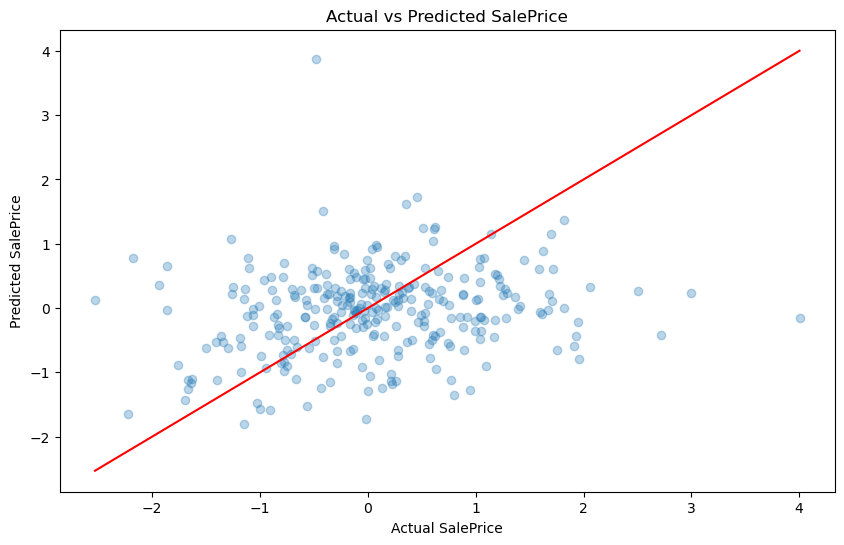

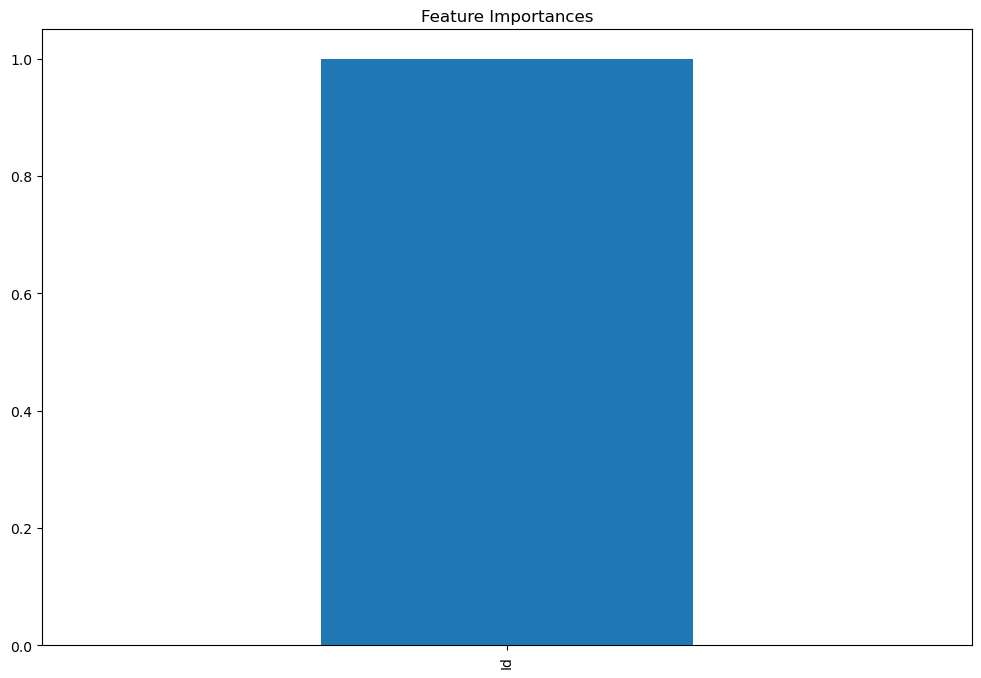

In [8]:

import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Feature importance visualization for Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## Conclusion


This project demonstrated the use of several machine learning techniques to predict house prices. 
The models used were Gradient Boosting, Linear Regression, and Random Forest. Among these, Random Forest showed 
promising results based on RMSE and R^2 scores.
